In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://taanila.fi/sales_data_sample.csv', encoding='cp1252')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
df.pivot_table(values = 'SALES', index = 'COUNTRY').sort_values(
    'SALES', ascending = True)

,SALES
COUNTRY,
Canada,3201.122286
Belgium,3285.230909
Italy,3315.701858
UK,3325.558750
Australia,3408.773514
France,3537.950701
Spain,3554.640117
Germany,3556.001452
Finland,3582.412065


Text(0.5, 0, 'SALES')

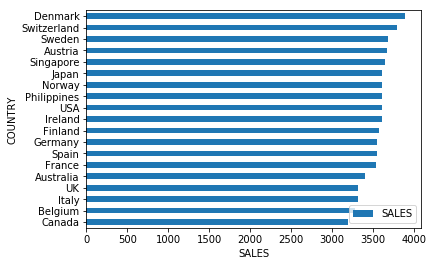

In [14]:
df.pivot_table(values = 'SALES', index = 'COUNTRY').sort_values(
    'SALES').plot.barh(legend = True)
plt.xlabel('SALES')

In [19]:
df.pivot_table(values = 'SALES', index = ['COUNTRY', 'YEAR_ID'])

SALES
COUNTRY     YEAR_ID             
Australia   2003     3287.460390
            2004     3575.333538
            2005     3374.231860
Austria     2003     3158.380000
            2004     4307.865833
            2005     4014.721176
Belgium     2003     1674.230000
            2004     3479.306522
            2005     3130.013750
Canada      2003     3640.633333
            2004     2951.654130
            2005     3743.663333
Denmark     2003     3673.804444
            2004     3649.441212
            2005     8670.956667
Finland     2003     3473.578437
            2004     4162.531364
            2005     3338.202895
France      2003     3594.958851
            2004     3406.126994
            2005     3796.193750
Germany     2003     3335.871905
            2004     3668.750732
Ireland     2004     3609.776875
Italy       2003     3202.926591
            2004     3495.192727
            2005     2964.995714
Japan       2004     3557.677857
            2005     3874.534000
Norway      2003     3708.162264
            2004     3466.596875
Philippines 2003     3549.408182
            2004     3982.187500
Singapore   2003     4041.126829
            2004     3315.400857
            2005     2254.393333
Spain       2003     3494.339569
            2004     3529.528175
            2005     3671.889551
Sweden      2003     3247.773333
            2004     3869.276452
            2005     3950.840000
Switzerland 2004     3797.211613
UK          2003     3469.645192
            2004     3104.290361
            2005     4533.645556
USA         2003     3556.261253
            2004     3555.845338
            2005     3910.210184

In [20]:
df.pivot_table(values = 'SALES', index = 'COUNTRY', columns = 'YEAR_ID')

YEAR_ID,2003,2004,2005
COUNTRY,,,
Australia,3287.460390,3575.333538,3374.231860
Austria,3158.380000,4307.865833,4014.721176
Belgium,1674.230000,3479.306522,3130.013750
Canada,3640.633333,2951.654130,3743.663333
Denmark,3673.804444,3649.441212,8670.956667
Finland,3473.578437,4162.531364,3338.202895
France,3594.958851,3406.126994,3796.193750
Germany,3335.871905,3668.750732,NaN
Ireland,NaN,3609.776875,NaN


In [21]:
df1 = df.pivot_table(values = 'SALES', index = 'YEAR_ID', 
                                     aggfunc = [np.mean, np.median, min, max, np.std])
df1

,mean,median,min,max,std
,SALES,SALES,SALES,SALES,SALES
YEAR_ID,,,,,
2003,3516.979540,3210.095,710.20,11279.2,1763.679136
2004,3512.388550,3141.570,577.60,12536.5,1775.284571
2005,3747.880146,3316.815,482.13,14082.8,2151.798783


In [22]:
df2 = df.pivot_table(values = 'SALES', index = 'COUNTRY', 
                                     aggfunc = [np.mean, np.median, min, max, np.std])
df2

,mean,median,min,max,std
,SALES,SALES,SALES,SALES,SALES
COUNTRY,,,,,
Australia,3408.773514,3070.400,652.35,9774.03,1754.157017
Austria,3673.864182,3307.200,640.05,9240.00,1906.932800
Belgium,3285.230909,2796.120,881.40,6804.63,1620.036091
Canada,3201.122286,2982.950,1119.93,9064.89,1442.516466
Denmark,3899.002381,3193.520,1146.50,10468.90,2122.524009
Finland,3582.412065,3247.830,891.03,10606.20,1786.214918
France,3537.950701,3154.305,482.13,11739.70,1942.309677
Germany,3556.001452,3271.200,948.99,8940.96,1809.495392


In [30]:
df[df['COUNTRY']=='France'].pivot_table(values = 'SALES', index = 'CITY')


,SALES
CITY,
Lille,3452.620500
Lyon,3484.737805
Marseille,2997.445600
Nantes,3405.081000
Paris,3842.066857
Reims,3293.730244
Strasbourg,4233.604211
Toulouse,3524.422000
Versailles,3601.906667


In [36]:
df[df['COUNTRY']=='USA'].pivot_table(values = 'SALES', index = 'CITY')


,SALES
CITY,
Allentown,3939.940000
Boston,3501.583182
Brickhaven,3516.068085
Bridgewater,4075.791600
Brisbane,3347.900667
Burbank,3544.972308
Burlingame,3552.443235
Cambridge,3664.315789
Glendale,3019.262273
